In [69]:
# Name: example_basic
# Authors: Stephan Meighen-Berger, Kruteesh Desai
# A basic example how to use the package'

In [1]:
# imports
from constants import pdm_constants as const
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
from pone_aeff import Aeff
import pickle
from matplotlib import rc

import os
import shutil
def find_nearest(array, value: float):
    
    """ Returns: index of the nearest vlaue of an array to the given number
    --------------
    idx :  float
    """
    array = np.array(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [2]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot

h_length=1.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
color_km = '#1a9641'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
low_E_sigma = {
                'numu': [0.45, 0.35, 0.25, 0.15],
                'nue': [0.55, 0.45, 0.35, 0.25],
                'nutau': [0.55, 0.45, 0.35, 0.25]},
high_E_sigma = {
                'numu': [0.25, 0.15, 0.10, 0.09],
                'nue': [0.15, 0.12, 0.09, 0.07],
                'nutau': [0.15, 0.12, 0.09, 0.07] }

In [4]:
name_part=['All','W','\[Tau]']
sigma_model = ['lopez', 'prada', 'mixed']

In [14]:
# Some example settings
#config['atmospheric showers']['interaction model'] = 'SIBYLL2.3c'
#config['atmospheric showers']['theta angles'] = np.linspace(0., 90., 91)|
#config['atmospheric showers']['particles of interest']=['nue']
#for i in name_part:
#    for s_m in sigma_model:    
config['general']['detector'] = 'POne'
config['general']['pone type'] = 'old'
config['general']['density'] = "NFW" #"Burkert" # 'NFW'
config['general']["channel"] = "\[Tau]"   # "\\[Nu]\\[Mu]" 
config['general']['sigma_model'] = 'prada'#'prada' #'lopez' #s_m
config['pone']['smearing'] = 'smeared'

config['pone']['low E sigma'] = {'numu': 0.25,
                                 'nue': 0.25,
                                 'nutau': 0.25}
config['pone']['high E sigma'] = {'numu': 0.15,
                                 'nue': 0.07,
                                 'nutau': 0.07}
#low     E sigma': {
#                    'numu': [0.45, 0.35, 0.25, 0.15],
#                    'nue': [0.55, 0.45, 0.35, 0.25],
#                    'nutau': [0.55, 0.45, 0.35, 0.25]},
#                'high E sigma': {
#                    'numu': [0.25, 0.15, 0.10, 0.09],
#                    'nue': [0.15, 0.12, 0.09, 0.07],
#                    'nutau': [0.15, 0.12, 0.09, 0.07]
#        pdm = PDM()
#        os.replace('../data/tmp_files/unsmeared/limits_results_POne_un_NFW.pkl', '../data/%s_pone/limits_results_POne_NFW_re_%s.pkl' %(s_m,i))
#        os.replace('../data/tmp_files/unsmeared/signal_grid_POne_un_NFW.pkl', '../data/%s_pone/signal_POne_NFW_re_%s.pkl' %(s_m,i))

In [15]:
surface_fluxe = pickle.load(open("../data/" + "surf_store_v1.p", "rb"))

In [16]:
pdm = PDM()

{'numu': 0.25, 'nue': 0.25, 'nutau': 0.25}
POne
pone background
Starting Calculation
True
Finished Calculating Background


100%|██████████| 3/3 [00:00<00:00, 150.26it/s]


In [8]:
e_grid = pdm._shower_sim.egrid
e_width = pdm._shower_sim.ewidth

In [78]:
_bkgrd_ice_data = [
                        '../data/icecube_10year_ps/events/IC40_exp.csv',
                        '../data/icecube_10year_ps/events/IC59_exp.csv',
                        '../data/icecube_10year_ps/events/IC79_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_I_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_II_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_III_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_IV_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_V_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_VI_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_VII_exp.csv',
                    ]

In [79]:
e_grid = e_grid
eff_po_15 = pdm._aeff.spl_A15(e_grid)
eff_po_51 = pdm._aeff.spl_A51(e_grid)
eff_po_55 = pdm._aeff.spl_A55(e_grid)

eff_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/eff_area_ice.pkl','rb'))

In [80]:
#figure, ax1 = plt.subplots(1,1,figsize=(std_size,std_size), sharex=True) 
#
#
#ax1.step(np.log10(e_grid), eff_po_15, color=color_pone, label=r'$\textrm{P-ONE}$' )
#ax1.step(np.log10(e_grid), eff_ice[60], color=color_ice, label=r'$\textrm{IceCube}$')
#ax1.step(np.log10(e_grid), eff_po_55, color=color_pone, linestyle='-.')
#ax1.step(np.log10(e_grid), eff_ice[15], color=color_ice, linestyle='-.')
#
#ax1.set_yscale("log")
#
#ax1.set_xlabel(r'$\log_{10}$ ( $\textrm{E}$ / $ \textrm{GeV} )$ ', fontsize=fontsize)
#
#ax1.set_ylabel(r'$\textrm{Effective Area}$ $[ \textrm{m}^2 ]$', fontsize=fontsize)
#
#ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
#ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
#
#
#
#ax1.set_xlim(2, 7)
#
#ax1.set_ylim(1e1,1e8)
#h, l = ax1.get_legend_handles_labels()
#lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +0.1),
#                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
#                 fancybox=True, frameon=False)
#ax1.add_artist(lgd1)
#legend_elements_s = [Line2D([0], [0], color='k',lw=1),
#                   Line2D([0], [0], color='k', linestyle='-.', lw=1.1)
#                  ]
#labels_s = [r'$\textrm{zenith angle}$ $30^{\circ}$',
#          r'$\textrm{zenith angle}$ $75^{\circ}$'
#          ]
#lgd2 = ax1.legend(legend_elements_s, labels_s, loc=7, bbox_to_anchor=(0.95, +1.03),
#             ncol=2, fontsize=fontsize-2, handlelength=h_length,
#             fancybox=True, frameon=False)
#ax1.add_artist(lgd2)
## ---------------------------------------------
## Showing the image
#plt.show()
#figure.savefig(PICS + "Final_eff_area"+".png",
#               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [81]:
# Grids
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']
m_4_id = find_nearest(mass_grid, 1e4)
m_6_id = find_nearest(mass_grid, 1e6)
m_3_id = find_nearest(mass_grid, 1e3)
m_5_id = find_nearest(mass_grid, 1e5)
sv_56 = find_nearest(sv_grid, 2.1e-23)
# The limit calculation


In [82]:
dphi_2=np.loadtxt(open("../data/m_1e2.csv"), delimiter = ",")
dphi_2[dphi_2[:,0].sort()]

dphi_4=np.loadtxt(open("../data/m_1e4.csv"), delimiter = ",")
dphi_4[dphi_4[:,0].sort()]

dphi_6=np.loadtxt(open("../data/m_1e6.csv"), delimiter = ",")
dphi_6[dphi_6[:,0].sort()]
#dphi_ice=np.loadtxt(open("../data/icecube.csv"), delimiter = ",")
#dphi_ice[dphi_ice[:,0].sort()]

array([[[4.71523093e+04, 1.53459280e-10],
        [5.60497613e+04, 1.96288387e-10],
        [7.04102047e+04, 2.26695859e-10],
        [9.25043476e+04, 2.62434648e-10],
        [1.15056452e+05, 2.83833139e-10],
        [1.48558994e+05, 3.20599461e-10],
        [1.93633804e+05, 3.92318799e-10],
        [2.52276868e+05, 5.18154640e-10],
        [3.09297992e+05, 6.89257983e-10],
        [3.56977496e+05, 9.89944054e-10],
        [3.87710108e+05, 2.29779058e-09],
        [4.53992662e+05, 3.17683977e-09],
        [4.82168854e+05, 4.38613018e-09],
        [5.21973227e+05, 6.05574703e-09],
        [5.73914043e+05, 9.73019151e-09],
        [6.31028068e+05, 7.24924411e-09],
        [6.93825892e+05, 2.03091762e-08],
        [7.45239618e+05, 1.59696980e-08],
        [7.98043927e+05, 1.22436833e-08],
        [8.51217508e+05, 1.76706590e-09],
        [9.15185392e+05, 1.37202694e-09],
        [9.96285866e+05, 1.14931629e-10]]])

In [83]:
np.array(sv_grid)

array([1.00000000e-28, 4.21696503e-28, 1.77827941e-27, 7.49894209e-27,
       3.16227766e-26, 1.33352143e-25, 5.62341325e-25, 2.37137371e-24,
       1.00000000e-23])

In [84]:
dphi_4=UnivariateSpline(dphi_4[:,0],dphi_4[:,1],k=1,s=0,ext=1)
#mass_grid[0],sv_grid[-1],mass_grid[-1],sv_grid[-1]
#dphi_ic=UnivariateSpline(dphi_ice[:,0],dphi_ice[:,1],k=1,s=0,ext=1)
dphi_6=UnivariateSpline(dphi_6[:,0],dphi_6[:,1],k=1,s=0, ext=1)
#dphi_2=UnivariateSpline(dphi_2[:,0],dphi_2[:,1],k=1,s=0, ext=1)


In [85]:


shower_flux = pickle.load(open('../data/shower.p','rb'))
shower_po = shower_flux[2][45]['numu']
surface_fluxe_ice = pickle.load(open("../data/surf_store_v1.p", "rb"))
shower_ice = surface_fluxe_ice[20][3] # background fluxes at 20° ----



In [86]:
np.logspace(2,6,53)[26]
sv_7 = find_nearest(sv_grid, 7e-22)
m_2_id = find_nearest(mass_grid, 1e2)

/home/kruteesh/Desktop/DM_nu_simulation/pone_dm/pone_dm/dm2nu.py:327: RuntimeWarning: invalid value encountered in divide
  return ((c_arr**3) * (1 - (1 + c_arr)**(-3)) /
/home/kruteesh/Desktop/DM_nu_simulation/pone_dm/pone_dm/dm2nu.py:436: RuntimeWarning: overflow encountered in power
  return 10**(a * np.log10(M_200_grid * self._const.h) + b)
Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3629, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'All'

The above exception was the direct 

Unexpected exception formatting exception. Falling back to standard exception


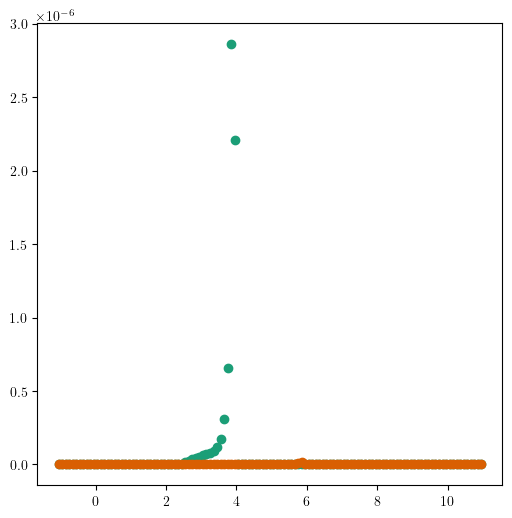

In [87]:
from asyncio import constants


figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
#  $<\sigma\nu>=%.1e$ $cm^{3}s^{-1}$' ,sv_grid[sv_56]
#label=r'$m_{x}=1.0e+04$ $\textrm{GeV} (Carlos$ $et.al)$'
#label=r'$m_{x}=1.0e+06$ $\textrm{\textrm{\textrm{GeV}}} (Carlos$ $et.al)$'
#ax1.set_title(r'$\sigma\nu = %.1e$' % (sv_grid[sv_56]), y=1.17, fontsize=fontsize)
#ax1.step(np.log10(e_grid), dphi_2(e_grid),'o', color="y")
plt.step(np.log10(e_grid), dphi_4(e_grid), 'o', color=color_4)
plt.step(np.log10(e_grid), dphi_6(e_grid), 'o',color=color_6)
#ax1.step(e_grid, (pdm._dm_nu.extra_galactic_flux(e_grid,mass_grid[0],sv)) * e_grid**2.,'-.',
#         label=r'$m_{x}$ = %.1e , $<\sigma\nu>$ = %.1eGeV Sim'%(mass_grid[0],sv))
burkert_flux_4 = (pdm._dm_nu.extra_galactic_flux_burkert(e_grid,mass_grid[m_4_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
burkert_flux_6 = (pdm._dm_nu.extra_galactic_flux_burkert(e_grid,mass_grid[m_6_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_6_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_2 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_2_id],sv_grid[sv_7]))
nfw_flux_3 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_3_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_3_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_4 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_4_id],sv_grid[sv_56])) + pdm._dm_nu.galactic_flux_c(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_6 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_6_id],sv_grid[sv_56])) + pdm._dm_nu.galactic_flux_c(e_grid,mass_grid[m_6_id],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_5 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_5_id],sv_grid[sv_7])) + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_5_id],sv_grid[sv_56], 2 , 2.3e23)
#ax1.step(np.log10(e_grid), burkert_flux_4 * e_grid**2., color=color_4, linest

#nfw_flux_2 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_2_id],sv_grid[sv_7]))
#nfw_flux_3 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_3_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[3],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_4 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_4_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[26],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_6 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_6_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[-1],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_5 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_5_id],sv_grid[sv_7]))


ax1.step([0],[0],'--', color='k', label=r'$\textrm{NFW Profile}$' )
ax1.step([0],[0],':' , lw=1.7, color='k', label=r'$\textrm{Burkert Profile}$' )
plt.plot([0],[0],'o', color='k', label=r'$\textrm{Argüelles et. al.}$' )
# 4*pi factor from now on is because of the plot y axis not being diffused meaning the d\Omega integral hasnt been done ------------------------
#ax1.step(np.log10(e_grid), burkert_flux_4 * e_grid**2. / (4*np.pi), ':', color=color_4, lw=2.1
#         )
#ax1.step(np.log10(e_grid), burkert_flux_6 * e_grid**2. / (4*np.pi), ':', color=color_6, lw=2.1
#         )

ax1.step(np.log10(e_grid), nfw_flux_4 * e_grid**2 , '--', color=color_4
        )
#ax1.step(np.log10(e_grid), nfw_flux_5 * e_grid**2., '*', color='b',
#         )
ax1.plot(np.log10(e_grid), nfw_flux_3 * e_grid**2 , '--', color=color_6
         )
ax1.step(np.log10(e_grid), (shower_po + pdm._Detector.astro_flux())*e_grid**2, color=color_pone, label=r'$\textrm{P}$-$\textrm{ONE}$ [ $\textrm{MCEq}$ ]') # Karlsruhe Corsika
# ax1.step(np.log10(e_grid), (shower_ice + pdm._Detector.astro_flux())*e_grid**2, color=color_ice, label=r'IceCube')
#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r'$\log_{10}$ ( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize)
ax1.set_ylabel(r'\textbf{$E^2$} $\textrm{d}$\textbf{$\phi$} / \textrm{d}\textbf{$E$}\textrm{d}$\Omega$   [ $\textrm{GeV}$ $\textrm{cm}^{-2}$ $\textrm{s}^{-1}$ $\textrm{sr}^{-1}$ ]', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(1.9, 7)
#ax1.set_ylim(1.1e-14,1.2e-5)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
legend_elements_s = [
        #Line2D([0], [0], color='y', linestyle='-', lw=1.3),
        #Line2D([0], [0], color=color_4,linestyle='-',lw=1.3),
        Line2D([0], [0], color=color_4,linestyle='-',lw=1.7),
        #Line2D([0], [0], color='b', linestyle='-', lw=1.3),
        Line2D([0], [0], color=color_6, linestyle='-', lw=1.7)
                  ]
labels_s = [
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_2_id]),
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_2_id]),
        r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_4_id]),
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_5_id]),
        r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_6_id])
          ]
lgd2 = ax1.legend(legend_elements_s, labels_s, loc=7, bbox_to_anchor=(1.02, +0.8),
             ncol=1, fontsize=fontsize-2, handlelength=h_length,
             fancybox=True, frameon=False)
ax1.add_artist(lgd2)
# ---------------------------------------------
# Showing the image

plt.show()
figure.savefig(PICS + "Final_flux"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [88]:
nfw_flux_4

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan, 2.32793490e-11, 1.82273056e-11,
       1.41724326e-11, 1.09606095e-11, 8.44837422e-12, 6.50251995e-12,
       5.02097473e-12, 3.90171270e-12, 3.06898184e-12, 2.44702946e-12,
       1.98408884e-12, 1.63690347e-12, 1.37141296e-12, 1.16386090e-12,
       9.95927446e-13, 8.55637822e-13, 7.34281554e-13, 6.27059123e-13,
       5.29423694e-13, 4.40689818e-13, 3.58388135e-13, 2.84067386e-13,
       2.18106877e-13, 1.60493956e-13, 1.13079201e-13, 7.59308994e-14,
       4.83270394e-14, 2.94268718e-14, 1.72822286e-14, 9.98730516e-15,
       5.69229643e-15, 3.07632148e-15, 2.70561124e-15, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [89]:
#signal_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_04_DM/limits_signal_grid.pkl','rb'))
signal_com_un = pickle.load(open("../data/14_04/unsmeared/signal_grid_combined_un.pkl","rb"))
signal_pone_un = pickle.load(open("../data/tmp_files/limits_signal_POne.pkl","rb"))
signal_pone_sm = pickle.load(open('../data/limits_signal_POne.pkl', 'rb'))
signal_pone_un_bur = pickle.load(open('../data/signal_grid_POne_un_Burkert.pkl','rb'))

In [90]:
#back_po = pickle.load(open('../data/background_pone_sm.pkl','rb'))
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/background_ice.pkl','rb'))
back_ice_ob = pickle.load(open('../data/tmp_files/background_ice_data_total.pkl','rb'))
#back_comb =  pickle.load(open('../data/background_combined.pkl','rb'))
background_pone_unsm = pickle.load(open('../data/background_pone_unsm.pkl','rb'))
background_pone_sm = pickle.load(open('../data/tmp_files/background_pone.pkl', 'rb'))
# background_pone_sm_35_15 = pickle.load(open('../data/14_04/smeared/35_15/background_pone.pkl', 'rb'))
# background_pone_sm_25_10 = pickle.load(open('../data/14_04/smeared/25_10/background_pone.pkl', 'rb'))
# background_pone_sm_15_009 = pickle.load(open('../data/14_04/smeared/15_009/background_pone.pkl', 'rb'))

In [91]:
pdm._signal_data

{'numu': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0

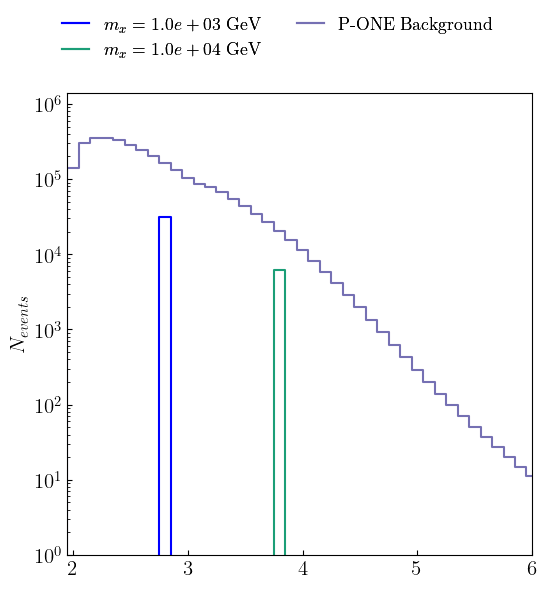

In [92]:
fig = plt.figure(figsize=(std_size,std_size))
gs = fig.add_gridspec(1, 1, hspace=0.06, wspace=0.05)
ax1 = gs.subplots( sharex=True, sharey=True)


#ax1.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][m_3_id]):]), pdm._signal_data['numu'][5][m_3_id], color='b', linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_3_id]))
#ax1.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][0]):]), pdm._signal_data["numu"][5][m_4_id], color=color_4, linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
#ax1.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][0]):]), pdm._signal_data["numu"][sv_56][m_6_id], color=color_6, linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_6_id]))
ax1.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][m_3_id]):]), signal_pone_un['numu'][sv_7][m_3_id], color='b', linestyle='-',
         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_3_id]))
ax1.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][0]):]), signal_pone_un["numu"][sv_7][m_4_id], color=color_4, linestyle='-',
         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))



#ax2.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][m_3_id]):]), signal_pone_un["numu"][sv_56][m_3_id], color='b', linestyle='-')#,
         #label=r'$m_{x}=%.1e$ $GeV$' % (mass_grid[2]))
#ax2.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][m_3_id]):]), signal_pone_un["numu"][sv_56][m_4_id], color=color_4, linestyle='-')#,
         #label=r'$m_{x}=%.1e$ $GeV$' % (mass_grid[4]))
#ax2.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][m_3_id]):]), signal_pone_un["numu"][sv_56][m_6_id], color=color_6, linestyle='-')#,
 #        #label=r'$m_{x}=%.1e$ $GeV$' % (mass_grid[-1]))

ax1.step(np.log10(e_grid), background_pone_sm['numu'], '-', color=color_pone, label=r'$\textrm{P-ONE Background}$')

#ax2.step(np.log10(e_grid), background_pone_unsm['numu'], '-', color=color_pone)

ax1.set_yscale("log")
#ax1.set_xlabel(r'$\log_{10}$( E / $GeV$ )', fontsize=fontsize+6)
ax1.set_ylabel(r'$N_{events}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(1.95, 6)
ax1.set_ylim(1e0,1.4e6)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.12),
                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

#ax2.set_xscale("log")
#ax2.set_yscale("log")
##ax2.set_xlabel(r'$\log_{10}$( E / $GeV$ )', fontsize=fontsize+6)
#ax2.set_ylabel(r'$N_{events}$', fontsize=fontsize)
#ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
#ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
#ax2.set_xlim(1.95, 6)
#ax2.set_ylim(1e0,1.4e6)
#
#ax2.set_xlabel(r'$\log_{10}$( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize)
#ax1.text(3.5,3e5, r'$\textrm{With Energy Reconstruction}$', fontsize=fontsize-2)
#ax2.text(3.5,3e5, r'$\textrm{Without Energy Reconstruction}$', fontsize=fontsize-2)

plt.show()
fig.savefig(PICS + "Final_signal"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [93]:
pdm._signal_data['numu'][sv_56][0].shape

(121,)

In [94]:
#figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
##ax1 = fig.add_gridspec(2, 1, hspace=0.06, wspace=0.05)
##(ax1) = gs.subplots( sharex=True, sharey=True)
#
#
#ax1.step(np.log10(e_grid[-len(signal_ice[sv_56][m_3_id]):]), signal_ice[sv_56][m_3_id], color='b', linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_3_id]))
#ax1.step(np.log10(e_grid[-len(signal_ice[sv_56][m_3_id]):]), signal_ice[sv_56][m_4_id], color=color_4, linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
#ax1.step(np.log10(e_grid[-len(signal_ice[sv_56][m_3_id]):]), signal_ice[sv_56][m_6_id], color=color_6, linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_6_id]))
#
#
#ax1.step(np.log10(e_grid[-len(signal_ice[sv_56][m_3_id]):]), np.sum(background_ic['numu'], axis=0)[-len(signal_ice[sv_56][m_3_id]):], '-', color=color_ice, label=r'$\textrm{IceCube Observed}$')
#
#ax1.set_yscale("log")
#ax1.set_xlabel(r'$\log_{10}$( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize)
#ax1.set_ylabel(r'$N_{events}$', fontsize=fontsize)
#ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
#ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
#ax1.set_xlim(2.8, 6)
#ax1.set_ylim(1e0,1e6)
#h, l = ax1.get_legend_handles_labels()
#lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
#                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
#                 fancybox=True, frameon=False)
#ax1.add_artist(lgd1)
#
#plt.show()
#figure.savefig(PICS + "Final_signal_ice"+".png",
#               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [95]:
flux={}
flux[15]={}
flux[85]={}
flux[120]={}
flux[15]['numu'] = (dphi_4(e_grid)) * e_grid**(-2)
flux[85]['numu'] = flux[15]['numu']
flux[120]['numu'] = flux[15]['numu']
flux[15]['nue']=flux[85]['nue']=flux[120]['nue']=flux[15]['nutau']=flux[85]['nutau']=flux[120]['nutau']=flux[15]['numu']
#_lit=pdm._Detector.sim2dec(flux,True)["numu"]


In [96]:
# Loading comparison data
th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")
unitarity = np.loadtxt(open('../data/Unitarity_bound.csv'), delimiter = ',')
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
unitarity = (unitarity[unitarity[:, 0].argsort()])

limits_ice_ww_0 = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/15_10_22_re_ww/data/limits_results.pkl','rb'))
mass_grid_0=np.array([     5,      6,      8,     10,     15,     20,     25,     30,
           40,     50,     60,     70,     80,     90,    100,    110,
          120,    130,    140,    150,    160,    180,    200,    220,
          240,    260,    280,    300,    330,    360,    400,    450,
          500,    550,    600,    650,    700,    750,    800,    900,
         1000,   1100,   1200,   1300,   1500,   1700,   2000,   2500,
         3000,   4000,   5000,   6000,   7000,   8000,   9000,  10000,
        12000,  15000,  20000,  30000,  50000, 100000])

limits_ice_ww = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/30_09_22/data/limits_results.pkl','rb'))
mass_grid_server = np.array([100, 250, 500, 750,  1e3,2.5e3, 5e3, 7.5e3, 1e4,
                 2.5e4, 5e4, 7.5e4, 1e5])

limits_pone_unsm = pickle.load(open("../data/limits_results_POne_un_NFW.pkl","rb"))
#limits_com = pickle.load(open("/home/kruteesh/Desktop/dm_data_server/14_03/data/limits_results.pkl", "rb"))
#limits_pone_unsm = pickle.load(open("../data/28_03_02/unsmeared/limits_results_POne_unsm.pkl","rb"))
#limits_pone_un_tt = pickle.load(open("../data/rescaled_pone/limits_results_POne_NFW_re_\[Tau].pkl","rb"))
limits_pone_tt_sm = pickle.load(open('../data/limits_results_POne_sm_NFW_tt.pkl', 'rb'))
limits_pone_tt_sm_1 = pickle.load(open('../data/tmp_files/smeared/limits_results_POne_sm_NFW.pkl', 'rb'))

limits_pone_45_25= pickle.load(open("../data/14_04/smeared/45_25/limits_results_POne_sm_NFW.pkl","rb"))

limits_pone_35_15= pickle.load(open("../data/14_04/smeared/35_15/limits_results_POne_sm.pkl","rb"))

limits_pone_25_10= pickle.load(open("../data/14_04/smeared/25_10/limits_results_POne_sm.pkl","rb"))

limits_pone_15_009= pickle.load(open("../data/14_04/smeared/15_009/limits_results_POne_sm.pkl","rb"))


cl_lit_ice = np.loadtxt('../data/IceCube_HE.csv', delimiter=",")
cl_lit_ice = (cl_lit_ice[cl_lit_ice[:, 0].argsort()])
xx,yy = np.meshgrid(np.log10( np.logspace(1, 6, 20)),np.log10( np.logspace(1, 6, 20)))


cl_lit_ic_86 = np.loadtxt('../data/IC_86_halo_tau.csv', delimiter=",")
cl_lit_ic_86 = (cl_lit_ic_86[cl_lit_ic_86[:, 0].argsort()])

cl_lit_ic_79 = np.loadtxt('../data/IC79_GC_tau.csv', delimiter=",")
cl_lit_ic_79 = (cl_lit_ic_79[cl_lit_ic_79[:, 0].argsort()])

cl_lit_ic_79_h = np.loadtxt('../data/cl_ice_79_halo.csv', delimiter=",")
cl_lit_ic_79_h = (cl_lit_ic_79_h[cl_lit_ic_79_h[:, 0].argsort()])


cl_lit_anta = np.loadtxt('../data/Antares_2007_2012.csv', delimiter=",")
cl_lit_anta = (cl_lit_anta[cl_lit_anta[:, 0].argsort()])

cl_lit_km_nfw = np.loadtxt('../data/km3net_nfw.csv', delimiter=",")
cl_lit_km_nfw = (cl_lit_km_nfw[cl_lit_km_nfw[:, 0].argsort()])

cl_lit_km_bur = np.loadtxt('../data/km3net_burkert.csv', delimiter=",")
cl_lit_km_bur = (cl_lit_km_bur[cl_lit_km_bur[:, 0].argsort()])

cl_lit_fermi = np.loadtxt('../data/Fermi_Magic_95.csv', delimiter=",")
cl_lit_fermi = (cl_lit_fermi[cl_lit_fermi[:, 0].argsort()])

cl_pone_smooth_tt = np.loadtxt('../data/limits_tau_smooth_pone.csv', delimiter=',')
cl_pone_smooth_tt = (cl_pone_smooth_tt[cl_pone_smooth_tt[:, 0].argsort()])

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
cl_pone_smooth_tt[:,1] = smooth(cl_pone_smooth_tt[:,1], 3)

In [97]:
m_id = []
for i in mass_grid:
 m_id.append(find_nearest(mass_grid_0, i))

In [98]:
pdm.results

{'numu': array([[9.99999283e-001, 9.99999552e-001, 9.99999706e-001,
         9.99999700e-001, 9.99999740e-001, 9.99999647e-001,
         9.99999816e-001, 9.99999873e-001, 9.99999905e-001,
         9.99999977e-001],
        [9.99987250e-001, 9.99992041e-001, 9.99994778e-001,
         9.99994665e-001, 9.99995384e-001, 9.99993717e-001,
         9.99996720e-001, 9.99997735e-001, 9.99998317e-001,
         9.99999585e-001],
        [9.99773302e-001, 9.99858468e-001, 9.99907138e-001,
         9.99905138e-001, 9.99917917e-001, 9.99888276e-001,
         9.99941678e-001, 9.99959728e-001, 9.99970077e-001,
         9.99992614e-001],
        [9.95976342e-001, 9.97486148e-001, 9.98349948e-001,
         9.98314435e-001, 9.98541341e-001, 9.98015092e-001,
         9.98963374e-001, 9.99284100e-001, 9.99468022e-001,
         9.99868663e-001],
        [9.30813615e-001, 9.56227334e-001, 9.71060241e-001,
         9.70446174e-001, 9.74376050e-001, 9.65284611e-001,
         9.81725369e-001, 9.87345491e-001, 9

In [99]:
#limits_ice_tt = []
#for sv,_ in enumerate(sv_grid):
#    tmp=[]
#    for m in m_id:
#        tmp.append(limits_ice_tt_0['numu'][sv][m])
#    limits_ice_tt.append(tmp)

In [100]:
sv_grid

array([1.00000000e-28, 4.21696503e-28, 1.77827941e-27, 7.49894209e-27,
       3.16227766e-26, 1.33352143e-25, 5.62341325e-25, 2.37137371e-24,
       1.00000000e-23])

# Fill through function for the band between smeared and unsmeared combined limits !!!!!!!! 

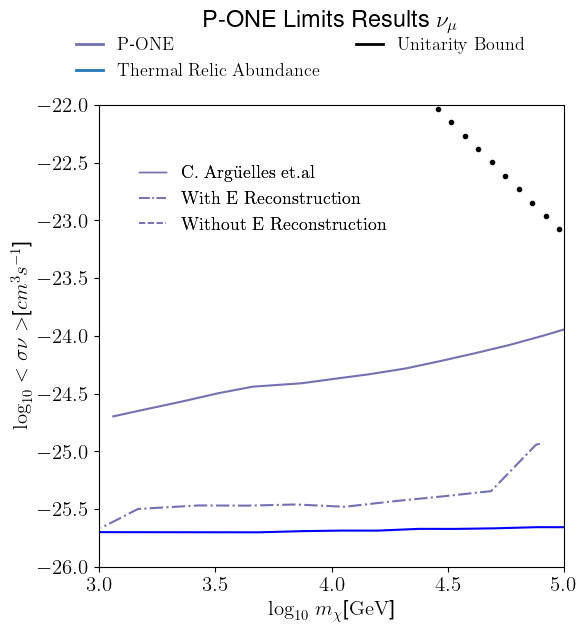

In [101]:
color = ['black', 'orange', 'purple']
color_sm = ['red', 'black', 'purple']
color_pa = ['']
color_pa = ['']
color_pa = ['']
color_pa = ['']
name = [r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$']
ll = ['-','--', '-.', 'dotted']
 # std_size, std_size * 6. / 8.),
for j,i in enumerate(config["pone"]["specific particle scaling"].keys()):
    # Limits
    # ---------------------------------------------
    # Setup

    figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    # ---------------------------------------------
    # Plotting
    plt.title(r'P-ONE Limits Results ' + name[j],fontsize=fontsize+2, y=1.15)  # +' Scaling Correction = '+str(config['advanced']['scaling correction'])
    
    ax1.contour(pdm.results[i], levels = [0.95], colors=color_pone,  linestyles='-.',
               origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                       min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    
    #ax1.plot(np.log10(cl_lit_km_nfw[:, 0]), np.log10(cl_lit_km_nfw[:, 1]), 'g' , label=r'$\textrm{KM3NET NFW}$')
    ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), color_pone, label='literature P-ONE')
    #ax1.plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]),'m',label='literature  IceCube')
    ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
             label='Thermal Relic Abundance')
    ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.k', 
             label='Unitarity Bound')
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("linear")
    ax1.set_yscale("linear")
    ax1.set_xlabel(r"$\log_{10}$ $m_{\chi}$[\textrm{GeV}]", fontsize=fontsize)
    ax1.set_ylabel(r"$\log_{10}$ $<\sigma \nu>$[$cm^{3} s^{-1}$]", fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
      # 
    #ax1.text(3.5, -23.7, "IceCube Simulation", fontsize=fontsize)

    #ax1.text(3.2, -24.8, r"P-ONE $\nu_\mu$", fontsize=fontsize)
    #ax1.text(3.2, -24.9, r" $\nu_e$", fontsize=fontsize)
    #ax1.text(3.1, -25.3, r" $\nu_\tau$", fontsize=fontsize)

    # ---------------------------------------------
    # Legend
    
    legend_elements_s = [Line2D([0], [0], color=color_pone, lw=2),
                       Line2D([0], [0], color=color_thermal,  lw=2),
                       Line2D([0], [0], color=color_unitary,  lw=2)
                      ]
    labels_s = [r'$\textrm{P}$-$\textrm{ONE}$',
              r'$\textrm{Thermal Relic Abundance}$',
              r'$\textrm{Unitarity Bound}$',
              ]

    lgd1 = ax1.legend(legend_elements_s, labels_s, loc=7, bbox_to_anchor=(0.95, +1.1),
                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)



    legend_elements = [Line2D([0], [0], color=color_pone, lw=1),
    
                       Line2D([0], [0], linestyle='-.', color=color_pone,  lw=1.2),
                       Line2D([0], [0], linestyle='--', color=color_pone,  lw=1.2)
                      ]
    labels = [r'$\textrm{C. Argüelles et.al}$',

              r'$\textrm{With E Reconstruction}$',
              r'$\textrm{Without E Reconstruction}$']  # Without E reconstruction}$']
    lgd2= ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.65, 0.795),
                     ncol=1, fontsize=fontsize-2, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd2)            
    ax1.set_xlim(3, max(np.log10(mass_grid)))
    ax1.set_ylim(-26, -22)
    ax1.add_artist(lgd1)
    # ---------------------------------------------
    # Showing the image
    plt.show()
    # ---------------------------------------------
    # Storing the image
    figure.savefig(PICS + "Limits_Example_all_%s.png" %(i),
               bbox_inches='tight', dpi=export_dpi,  facecolor='white')
    break


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_5731/827395518.py", line 13, in <cell line: 2>
    C_tt = ax1.contour(limits_pone_un_tt[i], levels = [0.90], colors=color_pone,  linestyles='--',
NameError: name 'limits_pone_un_tt' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x7ff307f12760, file "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3362>, 140681787025248, 76)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/

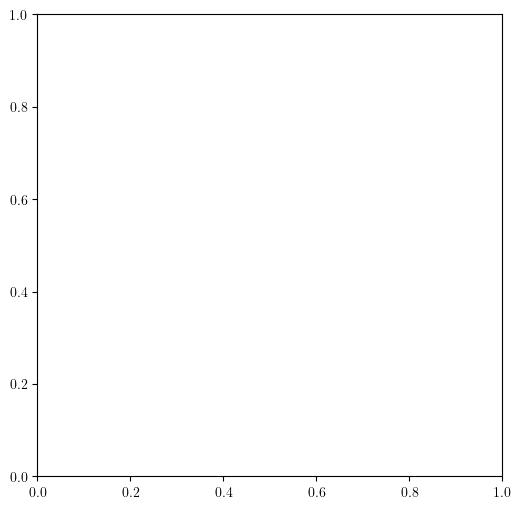

In [102]:
# pickle.dump(pdm.results, open('../data/nfw_unsmea_limits.pkl', 'wb'))
for j,i in enumerate(config["pone"]["specific particle scaling"].keys()):
    # Limits
    # ---------------------------------------------
    # Setup

    figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    # ---------------------------------------------
    # Plotting
    #ax1.contour(pdm.results[i], levels = [0.95], colors=color_pone,  linestyles='--',
    #           origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                   min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    C_tt = ax1.contour(limits_pone_un_tt[i], levels = [0.90], colors=color_pone,  linestyles='--',
               origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                       min(np.log10(sv_grid)), max(np.log10(sv_grid))), label=r'$\textrm{P-ONE Simulation}$')
    #C_tt_sm = ax1.contour(limits_pone_tt_sm[i], levels = [0.95], colors=color_pone,  linestyles='-.',
    #           origin='lower', extent=(min(np.log10(mass_grid_server)), max(np.log10(mass_grid)),
    #                                   min(np.log10(sv_grid)), max(np.log10(sv_grid))), label=r'$\textrm{P-ONE Simulation } (E_{Recon})$')
   
    C_tt_ice = ax1.contour(limits_ice_tt_0["nue"] ,levels=[0.90], colors=color_ice, origin='lower' ,linestyles='--',
                                extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))), label=r'$\textrm{IceCube Simulation}$')#
    #ax1.plot((cl_pone_smooth_tt[:, 0]), (cl_pone_smooth_tt[:, 1]), color_pone, linestyle=':', lw=2.1)
    
    ax1.plot(np.log10(cl_lit_ic_79_h[:, 0]), np.log10(cl_lit_ic_79_h[:, 1]), color_ice, linestyle=':', label=r'$\textrm{IC79 GH}$', lw=2.1)

    ax1.plot(np.log10(cl_lit_ic_86[:, 0]), np.log10(cl_lit_ic_86[:, 1]), color_ice , linestyle='-.', label=r'$\textrm{IC86}$', lw=2.1)
    ax1.plot(np.log10(cl_lit_anta[:, 0]), np.log10(cl_lit_anta[:, 1]), 'k' , label=r'$\textrm{ANTARES 2007 2012}$')
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("linear")
    ax1.set_yscale("linear")
    ax1.set_xlabel(r"$\log_{10}$ $m_{\chi}$[\textrm{GeV}]", fontsize=fontsize)
    ax1.set_ylabel(r"$\log_{10}$ $<\sigma \nu>$[$cm^{3} s^{-1}$]", fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)


    legend_elements = [Line2D([0], [0], linestyle=':', color=color_ice,  lw=2.1),
                       Line2D([0], [0], linestyle='-.', color=color_ice,  lw=2.1),
                       Line2D([0], [0], color='k',  lw=2.1), 
                       Line2D([0], [0], linestyle='--', color=color_pone,  lw=2.1),
                       Line2D([0], [0], linestyle='--', color=color_ice,  lw=2.1),
                       #Line2D([0], [0], linestyle=':', color=color_unitary,  lw=1.7),
                      ]
    labels = [r'$\textrm{IC79 GH}$',
              r'$\textrm{IC86}$',
              r'$\textrm{ANTARES 2007 2012}$',     
              r'$\textrm{P-ONE Simulation}$',
              r'$\textrm{IceCube Simulation}$',
              #r'$\textrm{Unitarity Bound}$'
              ]
    
    lgd2= ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.97, 1.1),
                     ncol=2, fontsize=fontsize-2, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd2)            

   
    ax1.set_xscale("linear")
    ax1.set_yscale("linear")
    ax1.set_xlabel(r"$\log_{10}$ ( $m_{\chi}$ / $\textrm{GeV}$ )", fontsize=fontsize)
    ax1.set_ylabel(r"$\log_{10}$ ( $<\sigma \nu>$ / $\textrm{cm}^{3}$ $\textrm{s}^{-1}$ )", fontsize=fontsize)
    ax1.text(3.5, -23.1, r'$\chi\chi \rightarrow \tau^{+}\tau^{-}\rightarrow \nu_{\mu}\bar{\nu}_{\mu}$', fontsize=fontsize)
    ax1.text(3.5, -23.4, r'$\textrm{NFW}$', fontsize=fontsize)
    
    ax1.text(3.7, -24.1, r'$\Delta$', color=color_ice, fontsize=fontsize)
    ax1.text(4.7, -24.7, r'$\Delta$', color=color_pone, fontsize=fontsize+2)
    ax1.text(5.1, -20.4, r'$\Delta$', color=color_pone, fontsize=fontsize+2)
    ax1.text(5.1, -20.64, r'$\Delta$', color=color_ice, fontsize=fontsize)


    ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
    ax1.set_xlim(3.0,5.2)
    ax1.set_ylim(-25.2, -21)  # min(np.log10(sv_grid)), -21
    if j==0:
        figure.savefig('../pics/Limits_result_tt.png',bbox_inches='tight', dpi=export_dpi, facecolor='white')
        break


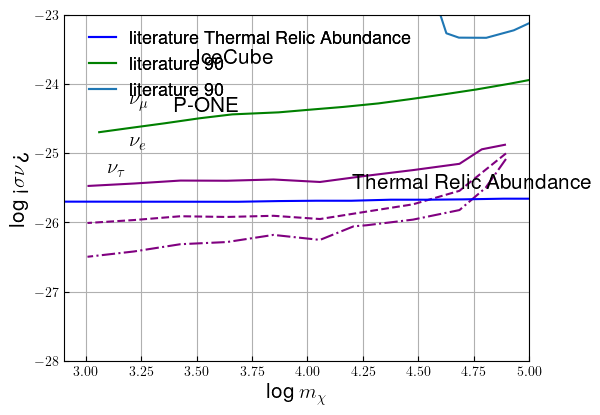

In [103]:
# All Limits-------------------------------------------
# Setup
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# ---------------------------------------------
# Plotting
ax1.contour(pdm.results["numu"], levels = [0.9], colors='purple', linestyles='-',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(pdm.results["nue"], levels = [0.9], colors='purple', linestyles='--',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)), 
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(pdm.results["nutau"], levels = [0.9], colors='purple', linestyles='-.',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
#ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
         label='literature Thermal Relic Abundance')
#ax1.contour(limits_ice["numu"], levels=[0.9], colors='red',origin='lower',
#                                extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
#                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))), legend='IceCube')
ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L P-ONE')
ax1.plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]), label='literature 90% C.L IceCube')
# ---------------------------------------------
# Axis options
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"log $m_{\chi}$", fontsize=fontsize)
ax1.set_ylabel(r"log <$\sigma\nu$>", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5, direction='in')
ax1.set_xlim(min(np.log10(mass_grid)), max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)),-23.0)
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
ax1.text(3.5, -23.7, "IceCube", fontsize=fontsize)
ax1.text(3.4, -24.4, "P-ONE", fontsize=fontsize)
ax1.text(3.2, -24.3, r"$\nu_\mu$", fontsize=fontsize)
ax1.text(3.2, -24.9, r"$\nu_e$", fontsize=fontsize)
ax1.text(3.1, -25.3, r"$\nu_\tau$", fontsize=fontsize)
ax1.text(4.2, -25.5, "Thermal Relic Abundance", fontsize=fontsize)
plt.grid()
# ---------------------------------------------
# Showing the image
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "All_Limits.png",
               bbox_inches='tight', dpi=export_dpi)

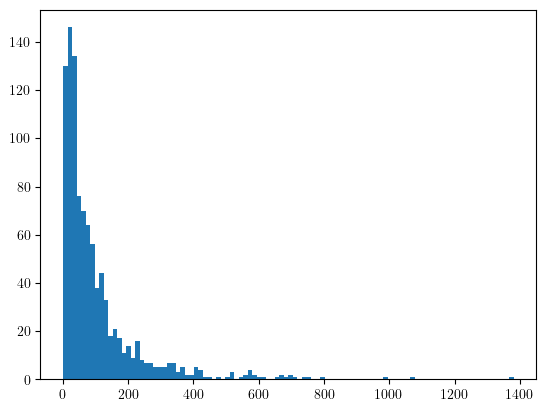

In [104]:
samples = np.random.lognormal(4, 0.3 * 4., 1000)
count, bins, ignored = plt.hist(samples, 100, density=False, align='mid')

In [105]:
mid_e_grid = np.logspace(3, 4, 100)

In [106]:
spl_mid_mean = UnivariateSpline([1e3, 1e4], [700., 1e4], k=1)
spl_mid_sigma = UnivariateSpline([1e3, 1e4], [0.45, 0.35], k=1)

In [107]:
def local_log_normal(x, mu, sigma):
    """Distribution function 
    x = E_grid
    mu = log(E) 
    sigma = fraction of E  ( so no fraction or percentage ) ( standard deviation as per definition )
    """
    sigma = ( sigma  )
    pdf = np.exp(-(np.log((x)) - mu )**2 / (2 * sigma**2)) / ( sigma * np.sqrt(2 * np.pi))

    return pdf

In [108]:
def _log_norm(E, mu, sigma):
    """Distribution function
    x = E_grid
    mu = log(E)
    sigma = fraction of E * E ( so no fraction or percentage )
    ( standard deviation as per definition )
    """
    pdf = (np.exp(- (np.log((E)) - mu)**2 / (2 * sigma**2)) /
           (sigma * np.sqrt(2 * np.pi)))
    return pdf

In [109]:
def distro_parms(Etrue):
    """ Parameter estimation function depending  on the E_true
    [mu] = [log10(E/GeV)]
    sigma = log10(E/GeV)
    """
    if Etrue < 1e3:
        mu = np.log(700)
        sigma = 0.25 
    elif 1e3 <= Etrue <= 1e4:
        mu = np.log(spl_mid_mean(Etrue))
        sigma = spl_mid_sigma(Etrue) 
    else:
        mu = np.log(Etrue)
        sigma = 0.15 
    return mu, sigma


#def smearing(Etrue, number_of_events, sampling_grid=hist_grid):
#    mu, sigma = distro_parms(Etrue)
#    return (
#        np.nan_to_num(local_log_normal(sampling_grid, mu, sigma)) *
#        number_of_events
#    )


In [110]:
samples_fun = []
samples = []
samples_fun_log = []
for i,E in enumerate(e_grid):
    mu, sigma = distro_parms(E)
    samples.append(np.random.lognormal((mu), sigma, len(e_grid))) # Axis0 = E, meaning the axis0 elements are the E_ture for which axis1 correspondece as distribution !!! Thats why transpose for imshow
    samples_fun.append(np.nan_to_num(local_log_normal(e_grid, mu, sigma)))
    samples_fun_log.append(np.nan_to_num(_log_norm(e_grid, mu, sigma))* np.log10(pdm._shower_sim.ewidth))
    

In [111]:
from matplotlib.colors import LogNorm

In [112]:
fontsize

15.0

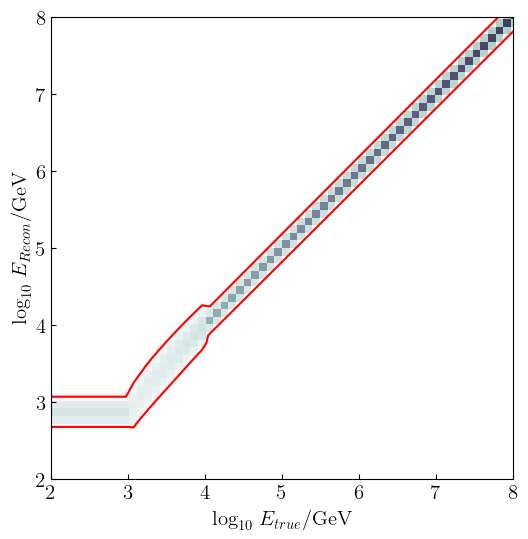

In [113]:
figure, ax1 = plt.subplots(1, 1, figsize=(std_size, std_size ), sharex=True)
z_p=ax1.imshow((np.array(samples_fun_log).T), origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid)) ),
               cmap=plt.get_cmap('bone_r'))
#figure.colorbar(z_p, ax=(ax1))
ax1.contour(np.array(samples_fun_log).T, levels = [0.68], colors='red', linestyles='-',
            origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid))) )
#ax1.contour(np.array(samples).T, levels = [0.68], colors='purple', linestyles='-',
#           origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid))), norm=LogNorm() )
#ax1.contour((samples_fun*e_grid).T, levels = [1.2], colors='purple', linestyles='-',
#            origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid))) )
#figure.colorbar(z_p, ax=(ax1))

ax1.set_xlabel(r"$\log_{10}$ $E_{true} / \textrm{GeV}$", fontsize=fontsize)
ax1.set_ylabel(r"$\log_{10}$ $E_{Recon} / \textrm{GeV}$", fontsize=fontsize)
#ax1.set_ylabel(r"Distribution fraction", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2,8)
ax1.set_ylim(2,8)
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

figure.savefig(PICS + "Reconstruction_"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [114]:

cmap_string= ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2',
'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r',
'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 
'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 
'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink',
'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 
'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 
'winter', 'winter_r']


In [115]:
for i,_ in enumerate(e_grid):
    print(np.trapz(samples_fun[i], x=e_grid))

728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
728.6192228882078
921.6451910158253
1254.7630207209354
1672.7898215197768
2196.9606243645158
2853.6052124161542
3675.2654910234123
4702.017118344217
5983.02980473176
7578.427817141758
9561.583271467256
11451.965974167708
14417.17097988194
18150.14291275476
22849.67614056277
28766

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_5731/2856536771.py", line 2, in <cell line: 2>
    ax1.imshow((count_np*e_grid).T, origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid)) ))
NameError: name 'count_np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x7ff307f12760, file "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3362>, 140681787025248, 76)

During handling of the above exception, another exception occurred

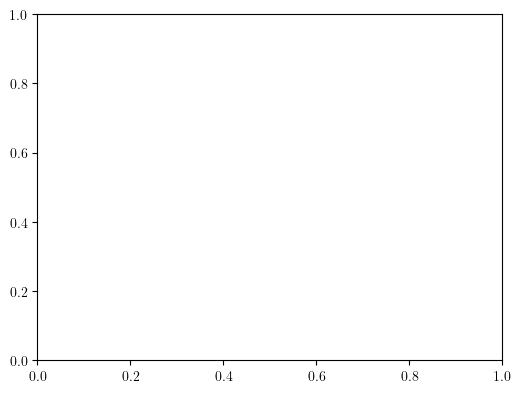

In [116]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6./8. ), sharex=True)
ax1.imshow((count_np*e_grid).T, origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid)) ))
ax1.set_xlabel(r"log $E_{true}$", fontsize=fontsize)
ax1.set_ylabel(r"log $E_{Recon}$", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5, direction='in')

# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize-3, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

plt.grid()

In [117]:
np.array(count_np).shape

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_5731/2310129223.py", line 1, in <cell line: 1>
    np.array(count_np).shape
NameError: name 'count_np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x7ff307f12760, file "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3362>, 140681787025248, 76)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/int

In [118]:
count_np

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_5731/825049650.py", line 1, in <cell line: 1>
    count_np
NameError: name 'count_np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x7ff307f12760, file "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3362>, 140681787025248, 76)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py"